['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
Linear Regression Mean Squared Error: 4491.476332767786
Linear Regression R^2 Score: 0.624162564503542
Linear Regression Model Intercept: 199.04124678500654
Linear Regression Model Coefficients: [  0.47269274   0.8767454    3.35442331  -3.35442331  37.59719359
  40.57719002 -53.06165115   7.72247129   2.30589472  -0.72875623
  10.26677807   8.00794334  -0.23527169 -24.72966165 -17.9291625 ]


/Users/rachel/Desktop/binf5507git/BINF5507/Assignment2/Scripts/data_preprocessor.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[x].fillna(data[x].mean(), inplace=True)


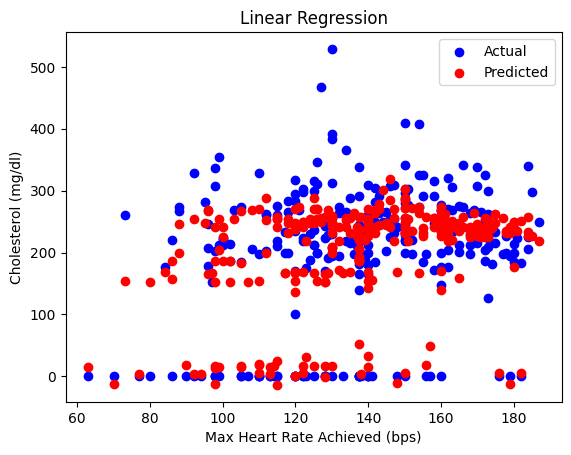

ElasticNet Regression - Mean Squared Error: 5448.787484108148, RMSE: 73.81590265050038, R^2 Score: 0.5440567504158593
ElasticNet Regression Model Coefficients: [ 3.05715512e-01 -5.29559912e+00  9.34537463e+00 -9.34538241e+00
  4.20846134e+01  4.68395246e+01 -9.25882626e+01  6.04699150e+00
  3.70729079e+00  1.79341866e+01  3.16296112e+01  1.85194158e+01
 -6.56447349e+00 -1.57623448e+01  7.50794035e-02]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.574e+06, tolerance: 7.574e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

ElasticNet Regression Ideal - Mean Squared Error: 4474.903476412414, RMSE: 66.89471934624149, R^2 Score: 0.6255493467929225
ElasticNet Regression Ideal Model Coefficients: [ 2.88550611e-02  4.67171402e-01  1.59086984e+01 -6.77885774e-15
  7.68181470e+01  8.37655165e+01 -1.58476910e+02  1.41386667e+01
  4.44167074e+00 -0.00000000e+00  2.85960812e+01  1.89259852e+01
 -2.23402756e-01 -4.39572426e+01 -3.11684175e+01]


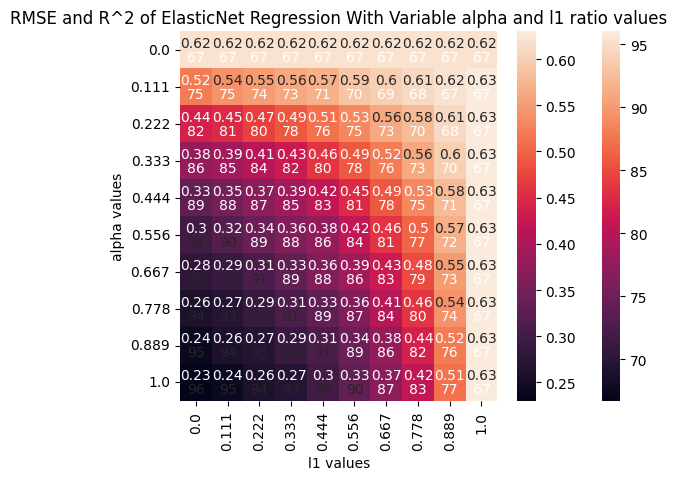

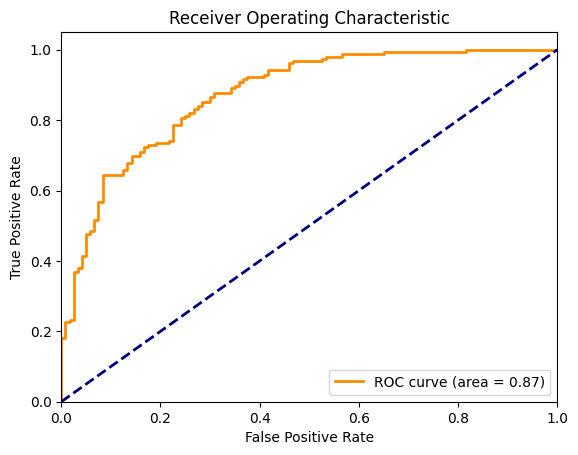

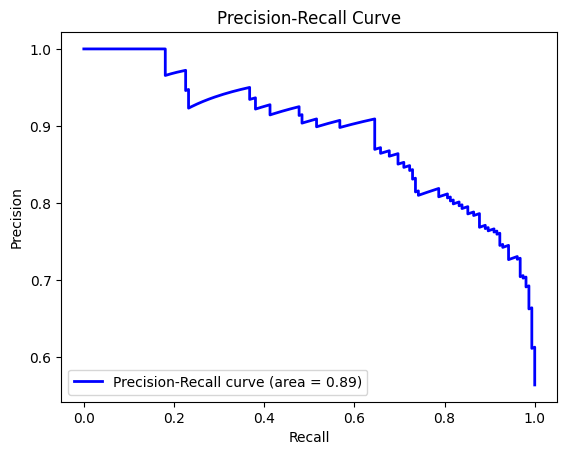

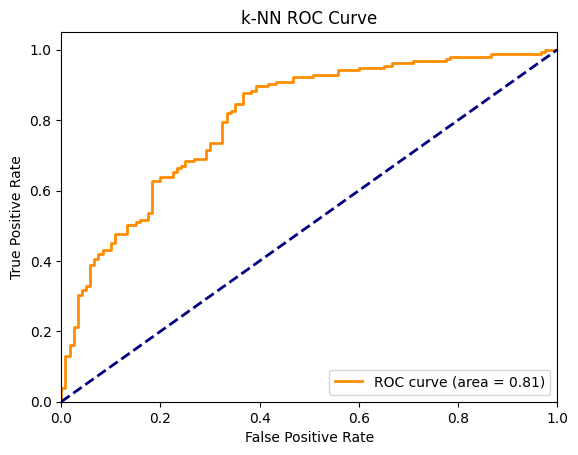

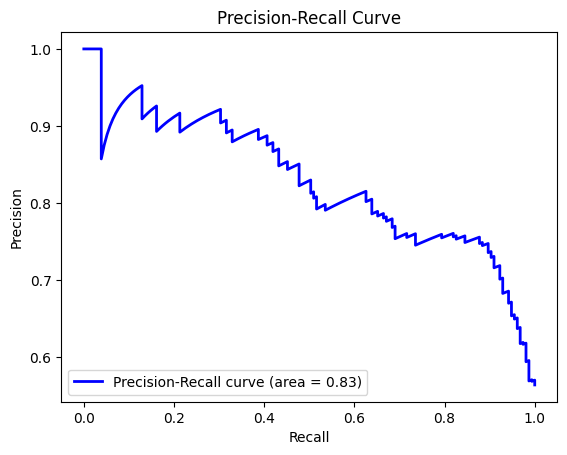

In [2]:
# Import modules
import pandas as pd
import numpy as np
import data_preprocessor as dp
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# Import dataset
data = pd.read_csv("/Users/rachel/Desktop/binf5507/Assignment2/Data/heart_disease_uci(1).csv")

# Data Exploration and Cleaning

data = data.drop(columns = ["ca", "thal", "slope"], axis = 1) # Removing columns with lots of missing data, or data that cannot be imputed/inferred from the dataset
data = data.dropna(subset = ['restecg']) # Drop 2 samples/rows with NA for resting ECG 
clean_data = dp.impute_missing_values(data, strategy='mean') # Imputing values for columns where only some data is missing
clean_data = dp.remove_duplicates(data)


# # One hot encoding for categorical features
onehot_data = pd.get_dummies(clean_data)
correlation_matrix = onehot_data.corr()
features_remove = correlation_matrix[abs(correlation_matrix['chol']) < 0.1] # identify features with little to no correlation with cholesterol
colnames_to_remove = features_remove.index.to_list # List of columns to drop from dataframe based on low correlation
onehot_data = onehot_data.drop(['age', 'trestbps', 'oldpeak', 'dataset_VA Long Beach', 'cp_non-anginal',
       'cp_typical angina', 'restecg_normal'], axis = 1)

# # 1. Linear Regression
X = onehot_data.drop(columns='chol', axis = 1) # Training with all remaining features, dropping the target
y = (onehot_data["chol"]) # Cholesterol as target

# # Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# # Train a linear regression model & scale data
lin_reg = LinearRegression()
scaler = StandardScaler()
fittedmodel = lin_reg.fit(scaler.fit_transform(X_train), y_train) 

# # Predict on the test set
y_pred = lin_reg.predict(scaler.fit_transform(X_test)) 

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
c = fittedmodel.intercept_ # intercept
m = fittedmodel.coef_ # feature coeffcients 
print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R^2 Score: {r2}")
print(f"Linear Regression Model Intercept: {c}")
print(f"Linear Regression Model Coefficients: {m}")


# Plot the result
plt.scatter(X_test['thalch'], y_test, color='blue', label='Actual')
plt.scatter(X_test['thalch'], y_pred, color='red', label='Predicted')
plt.xlabel('Max Heart Rate Achieved (bps)')
plt.ylabel('Cholesterol (mg/dl)')
plt.title('Linear Regression')
plt.legend()
plt.show()


# Elastic Net Regression

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.1)
elasticmodel = elastic_reg.fit(X_train, y_train)
y_pred_elastic = elastic_reg.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
print(f"ElasticNet Regression - Mean Squared Error: {mse_elastic}, RMSE: {rmse_elastic}, R^2 Score: {r2_elastic}")
print(f"ElasticNet Regression Model Coefficients: {elasticmodel.coef_}")


# Heatmap

# Define start and end values
alpha_test = np.linspace(0, 1, num = 10)
l1_test = np.linspace(0, 1, num = 10)
alphatest_rounded = np.round(alpha_test, 3)
l1test_rounded = np.round(l1_test, 3)

# Create arrays to store R2 and RMSE values in
r2_scores = np.zeros((len(alpha_test), len(l1_test)))
rmse_scores = np.zeros((len(alpha_test), len(l1_test)))

# Loop through alpha test values and l1 test values to find the R2 and RMSE for each 
for i, alpha in enumerate(alpha_test):
    for j, l1_ratio in enumerate(l1_test):
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores[i, j] = round(r2_score(y_test, y_pred), ndigits=2)
        rmse_scores[i, j] = round(np.sqrt(mean_squared_error(y_test, y_pred)), ndigits=2)

# Plot heatmap
rmseheatmap = sns.heatmap(rmse_scores, annot=True, annot_kws={'va':'top'}, xticklabels=l1test_rounded, yticklabels=alphatest_rounded)
r2heatmap = sns.heatmap(r2_scores, annot=True, annot_kws={'va':'bottom'}, xticklabels=l1test_rounded, yticklabels=alphatest_rounded)
rmseheatmap.set_title("RMSE and R^2 of ElasticNet Regression With Variable alpha and l1 ratio values")
rmseheatmap.set_xlabel("l1 values")
rmseheatmap.set_ylabel("alpha values")

# Using the ideal parameters determined by heatmap
elastic_reg_ideal = ElasticNet(alpha = 0.111, l1_ratio = 1)
elasticmodelideal = elastic_reg_ideal.fit(X_train, y_train)
y_pred_elastic_ideal = elastic_reg_ideal.predict(X_test)
mse_elastic_ideal = mean_squared_error(y_test, y_pred_elastic_ideal)
rmse_elastic_ideal = np.sqrt(mse_elastic_ideal)
r2_elastic_ideal = r2_score(y_test, y_pred_elastic_ideal)
print(f"ElasticNet Regression Ideal - Mean Squared Error: {mse_elastic_ideal}, RMSE: {rmse_elastic_ideal}, R^2 Score: {r2_elastic_ideal}")
print(f"ElasticNet Regression Ideal Model Coefficients: {elasticmodelideal.coef_}")

# 2. Classification Models

# Using clean_data from above, continuing with one hot encoding 
onehot_data_num = pd.get_dummies(clean_data)
correlation_matrix = onehot_data_num.corr()
features_remove_num = correlation_matrix[abs(correlation_matrix['num']) < 0.1] # identify features with little to no correlation with heart disease diagnosis
colnames_to_remove_num = features_remove_num.index.to_list # List of columns to drop from dataframe based on low correlation
onehot_data_num = onehot_data_num.drop(['dataset_Cleveland', 'cp_typical angina', 'restecg_lv hypertrophy'], axis = 1)
onehot_data_num["heart_disease"] = onehot_data_num["num"].apply(lambda x: 0 if x ==0 else 1) # Changing target to a binary variable
onehot_data_num = onehot_data_num.drop(['num'], axis = 1)

# Constructing the dataset
Xnum = onehot_data_num.drop(columns='heart_disease', axis = 1) # Training with all remaining features, dropping the target
ynum = (onehot_data_num["heart_disease"]) # Disease diagnosis (num) as target

# Split the data into training and testing sets
X_trainnum, X_testnum, y_trainnum, y_testnum = train_test_split(Xnum, ynum, test_size=0.3, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(penalty='l2', solver='liblinear')
log_reg.fit(X_trainnum, y_trainnum)

# Predict probabilities
y_scores = log_reg.predict_proba(X_testnum)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_testnum, y_scores)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_testnum, y_scores)
average_precision = average_precision_score(y_testnum, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

#KNN

knn = KNeighborsClassifier(n_neighbors=15, weights='distance' ,metric='manhattan') # best configuration
knn.fit(X_trainnum, y_trainnum)
# Predict probabilities
y_scores_knn = knn.predict_proba(X_testnum)[:, 1]

# Compute ROC curve and ROC area
fpr_knn, tpr_knn, _ = roc_curve(y_testnum, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-NN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compute Precision-Recall curve and PR area
precision, recall, _ = precision_recall_curve(y_testnum, y_scores_knn)
average_precision = average_precision_score(y_testnum, y_scores_knn)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()